In [1]:
# Add this code to a new cell in your notebook to inspect a sample MAT file
import scipy.io
import os
import numpy as np # Make sure numpy is imported

# --- Path to an example MAT file (change folder name if needed) ---
example_video_folder = 'CARDS_COURTYARD_B_T' # Choose any video folder name
example_mat_path = f'/kaggle/input/egohands/egohands_data/_LABELLED_SAMPLES/{example_video_folder}/polygons.mat'
# --- ---

print(f"Attempting to load MAT file: {example_mat_path}")

if os.path.exists(example_mat_path):
    try:
        mat_contents = scipy.io.loadmat(example_mat_path)
        print("\n--- MAT File Inspection ---")
        print("Keys found:", mat_contents.keys())

        # Focus on the 'polygons' key
        if 'polygons' in mat_contents:
             polygons_data = mat_contents['polygons']
             print("\nStructure of 'polygons':", type(polygons_data))
             # Check shape/size if it's an array
             if isinstance(polygons_data, np.ndarray):
                 print("Shape of 'polygons':", polygons_data.shape) # Often (1, 100) or similar

             # Try to access data for the first frame (index 0)
             # The structure might require multiple indices, e.g., [0][0] if nested
             try:
                 # Adjust indexing based on the printed shape above
                 first_frame_polygons = polygons_data[0][0] # Common nesting, adjust if needed
                 print("\nData type for first frame (index 0):", type(first_frame_polygons))

                 if isinstance(first_frame_polygons, np.ndarray):
                     print("Shape of first frame data:", first_frame_polygons.shape) # e.g., (4,) if 4 hands max
                     print("\nInspecting hand polygons within the first frame:")
                     # Loop through the elements corresponding to hands for the first frame
                     for i in range(first_frame_polygons.shape[0]):
                         hand_poly_data = first_frame_polygons[i]
                         print(f"\n  Hand index {i}:")
                         print(f"    Data type: {type(hand_poly_data)}")
                         # Often, the actual points are nested again
                         if isinstance(hand_poly_data, np.ndarray) and hand_poly_data.ndim == 1 and len(hand_poly_data) > 0:
                             actual_points = hand_poly_data[0]
                             print(f"    Nested data type: {type(actual_points)}")
                             if isinstance(actual_points, np.ndarray):
                                 print(f"    Points Array Shape: {actual_points.shape}") # Should be (N, 2) for N points
                                 # print(f"    Points (first 5): \n{actual_points[:5]}") # Print sample points
                             else:
                                  print(f"    Nested data is not an ndarray.")

                         elif isinstance(hand_poly_data, np.ndarray):
                              print(f"    Points Array Shape: {hand_poly_data.shape}") # Might be directly the points
                         else:
                             print(f"    Data is not an ndarray.")
                 else:
                      print("First frame data is not an ndarray.")

             except IndexError:
                 print("\nError: Could not access polygons_data[0][0]. Check the shape and structure of 'polygons'. Maybe it's just polygons_data[0]?")
             except Exception as e:
                 print(f"\nError inspecting polygon data structure: {e}")
        else:
             print("\n'polygons' key not found in MAT file.")

    except Exception as e:
        print(f"\nError loading or processing MAT file: {e}")

else:
    print(f"\nError: Example MAT file not found at the specified path.")

Attempting to load MAT file: /kaggle/input/egohands/egohands_data/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/polygons.mat

--- MAT File Inspection ---
Keys found: dict_keys(['__header__', '__version__', '__globals__', 'polygons'])

Structure of 'polygons': <class 'numpy.ndarray'>
Shape of 'polygons': (1, 100)

Data type for first frame (index 0): <class 'numpy.void'>
First frame data is not an ndarray.


In [2]:
# Add this code to a new cell in your notebook to inspect the fields within numpy.void
import scipy.io
import os
import numpy as np # Make sure numpy is imported

# --- Path to an example MAT file (change folder name if needed) ---
# Use the same folder name as the one that worked previously
example_video_folder = 'CARDS_COURTYARD_B_T'
example_mat_path = f'/kaggle/input/egohands/egohands_data/_LABELLED_SAMPLES/{example_video_folder}/polygons.mat'
# --- ---

print(f"Attempting to load MAT file: {example_mat_path}")

if os.path.exists(example_mat_path):
    try:
        mat_contents = scipy.io.loadmat(example_mat_path)
        print("\n--- Refined MAT File Inspection ---")
        print("Keys found:", mat_contents.keys())

        if 'polygons' in mat_contents:
             polygons_data = mat_contents['polygons']
             print("\nStructure of 'polygons':", type(polygons_data))
             if isinstance(polygons_data, np.ndarray):
                 print("Shape of 'polygons':", polygons_data.shape)

             try:
                 # Adjust indexing based on previous output shape (1, 100) -> [0][0] likely correct
                 first_frame_polygons = polygons_data[0][0]
                 print("\nData type for first frame (index 0):", type(first_frame_polygons))

                 # --- Added inspection specifically for numpy.void ---
                 if isinstance(first_frame_polygons, np.void):
                     print("Object is numpy.void, likely a structured array.")
                     # Check the dtype and potential field names
                     print("Data type (dtype):", first_frame_polygons.dtype)
                     if hasattr(first_frame_polygons.dtype, 'names') and first_frame_polygons.dtype.names:
                         field_names = first_frame_polygons.dtype.names
                         print("Field names found:", field_names)

                         # Try accessing data using field names
                         for name in field_names:
                             print(f"\n  Inspecting Field '{name}':")
                             try:
                                 field_data = first_frame_polygons[name]
                                 print(f"    Data type: {type(field_data)}")
                                 if isinstance(field_data, np.ndarray):
                                     print(f"    Array Shape: {field_data.shape}")
                                     # Check if it contains points (N, 2)
                                     if field_data.ndim == 2 and field_data.shape[1] == 2:
                                         print(f"    ==> Looks like polygon points!")
                                         # print(f"    Points (first 5):\n{field_data[:5]}")
                                     # Handle potential nesting like [[points_array]]
                                     elif field_data.ndim == 1 and len(field_data) > 0 and isinstance(field_data[0], np.ndarray):
                                          nested_points = field_data[0]
                                          if isinstance(nested_points, np.ndarray) and nested_points.ndim == 2 and nested_points.shape[1] == 2:
                                             print(f"    ==> Looks like NESTED polygon points! Shape inside: {nested_points.shape}")
                                             # print(f"    Nested Points (first 5):\n{nested_points[:5]}")
                                          else:
                                             print(f"    Nested data shape is not (N, 2). Shape: {nested_points.shape if isinstance(nested_points, np.ndarray) else 'N/A'}")
                                     else:
                                          print(f"    Array shape is not (N, 2) or nested (N, 2).")
                                 elif field_data.size == 0 or (isinstance(field_data, np.ndarray) and field_data.shape == (0,0)) or (isinstance(field_data, list) and len(field_data)==0) :
                                      print(f"    Field is empty (no polygon for this hand type in this frame).")

                                 else:
                                     print(f"    Data is not a numpy array.")
                             except Exception as e_field:
                                 print(f"    Error accessing/inspecting field '{name}': {e_field}")
                     else:
                         print("No field names found in dtype. The structure might be different than expected.")
                 # --- End Added inspection ---
                 else:
                      print("First frame data is not numpy.void. Previous inspection method might apply.")

             except IndexError:
                 print("\nError: Could not access polygons_data[0][0]. Check the shape and structure of 'polygons'.")
             except Exception as e:
                 print(f"\nError inspecting detailed polygon data structure: {e}")
        else:
             print("\n'polygons' key not found in MAT file.")

    except Exception as e:
        print(f"\nError loading or processing MAT file: {e}")

else:
    print(f"\nError: Example MAT file not found at the specified path.")

Attempting to load MAT file: /kaggle/input/egohands/egohands_data/_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/polygons.mat

--- Refined MAT File Inspection ---
Keys found: dict_keys(['__header__', '__version__', '__globals__', 'polygons'])

Structure of 'polygons': <class 'numpy.ndarray'>
Shape of 'polygons': (1, 100)

Data type for first frame (index 0): <class 'numpy.void'>
Object is numpy.void, likely a structured array.
Data type (dtype): [('myleft', 'O'), ('myright', 'O'), ('yourleft', 'O'), ('yourright', 'O')]
Field names found: ('myleft', 'myright', 'yourleft', 'yourright')

  Inspecting Field 'myleft':
    Data type: <class 'numpy.ndarray'>
    Array Shape: (1, 0)
    Array shape is not (N, 2) or nested (N, 2).

  Inspecting Field 'myright':
    Data type: <class 'numpy.ndarray'>
    Array Shape: (1, 0)
    Array shape is not (N, 2) or nested (N, 2).

  Inspecting Field 'yourleft':
    Data type: <class 'numpy.ndarray'>
    Array Shape: (97, 2)
    ==> Looks like polygon points!

  I

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Using device: cuda
Found 48 video folders.


Scanning Folders:   0%|          | 0/48 [00:00<?, ?it/s]

Found 4800 total labeled frames.
Training samples: 4080, Validation samples: 720
Using 4 workers for DataLoaders.
Verifying data loader with corrected mask function...
Image batch shape: torch.Size([8, 3, 320, 640])
Mask batch shape: torch.Size([8, 320, 640])
Mask data type: torch.int64
Mask unique values: tensor([0, 1, 2])
Initial batch contains hand pixels. Data loader verification successful.
Creating base model: hrnet_w18 with features_only=True


model.safetensors:   0%|          | 0.00/85.6M [00:00<?, ?B/s]

Determining feature channels from base model using dummy pass...
Debug: base_model output type: <class 'list'>
Selected feature map at index 0 with shape: torch.Size([2, 64, 160, 320])
Selected features: Channels=64, H=160, W=320

--- Starting Training with Corrected Masks ---

Epoch 1/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.8117 | Time: 73.49s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.6077 | Val mIoU: 0.3063
Model saved to hrnet_egohands_best.pth (Val Loss: 0.6077, Val mIoU: 0.3063)

Epoch 2/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.4686 | Time: 69.45s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.3677 | Val mIoU: 0.3063
Model saved to hrnet_egohands_best.pth (Val Loss: 0.3677, Val mIoU: 0.3063)

Epoch 3/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.3108 | Time: 68.30s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.2690 | Val mIoU: 0.3063
Model saved to hrnet_egohands_best.pth (Val Loss: 0.2690, Val mIoU: 0.3063)

Epoch 4/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.2512 | Time: 67.84s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.2352 | Val mIoU: 0.3063
Model saved to hrnet_egohands_best.pth (Val Loss: 0.2352, Val mIoU: 0.3063)

Epoch 5/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.2266 | Time: 69.00s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.2171 | Val mIoU: 0.3063
Model saved to hrnet_egohands_best.pth (Val Loss: 0.2171, Val mIoU: 0.3063)

Epoch 6/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.2141 | Time: 68.43s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.2082 | Val mIoU: 0.3063
Model saved to hrnet_egohands_best.pth (Val Loss: 0.2082, Val mIoU: 0.3063)

Epoch 7/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.2072 | Time: 68.54s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.2022 | Val mIoU: 0.3063
Model saved to hrnet_egohands_best.pth (Val Loss: 0.2022, Val mIoU: 0.3063)

Epoch 8/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.2027 | Time: 68.42s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1997 | Val mIoU: 0.3063
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1997, Val mIoU: 0.3063)

Epoch 9/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1998 | Time: 67.79s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1966 | Val mIoU: 0.3063
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1966, Val mIoU: 0.3063)

Epoch 10/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1977 | Time: 67.67s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1951 | Val mIoU: 0.3064
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1951, Val mIoU: 0.3064)

Epoch 11/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1962 | Time: 68.50s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1934 | Val mIoU: 0.3073
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1934, Val mIoU: 0.3073)

Epoch 12/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1949 | Time: 67.93s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1920 | Val mIoU: 0.3111
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1920, Val mIoU: 0.3111)

Epoch 13/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1937 | Time: 66.76s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1911 | Val mIoU: 0.3159
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1911, Val mIoU: 0.3159)

Epoch 14/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1928 | Time: 68.02s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1905 | Val mIoU: 0.3167
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1905, Val mIoU: 0.3167)

Epoch 15/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1919 | Time: 67.54s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1900 | Val mIoU: 0.3225
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1900, Val mIoU: 0.3225)

Epoch 16/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1912 | Time: 67.74s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1892 | Val mIoU: 0.3214
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1892, Val mIoU: 0.3214)

Epoch 17/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1907 | Time: 67.40s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1881 | Val mIoU: 0.3287
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1881, Val mIoU: 0.3287)

Epoch 18/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1900 | Time: 68.05s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1878 | Val mIoU: 0.3387
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1878, Val mIoU: 0.3387)

Epoch 19/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1894 | Time: 69.19s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1871 | Val mIoU: 0.3441
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1871, Val mIoU: 0.3441)

Epoch 20/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1890 | Time: 70.02s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1869 | Val mIoU: 0.3500
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1869, Val mIoU: 0.3500)

Epoch 21/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1890 | Time: 69.61s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1866 | Val mIoU: 0.3557
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1866, Val mIoU: 0.3557)

Epoch 22/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1885 | Time: 70.03s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1861 | Val mIoU: 0.3529
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1861, Val mIoU: 0.3529)

Epoch 23/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1878 | Time: 70.57s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1858 | Val mIoU: 0.3696
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1858, Val mIoU: 0.3696)

Epoch 24/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1878 | Time: 70.14s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1858 | Val mIoU: 0.3740

Epoch 25/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1871 | Time: 70.02s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1852 | Val mIoU: 0.3677
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1852, Val mIoU: 0.3677)

Epoch 26/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1873 | Time: 70.55s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1854 | Val mIoU: 0.3783

Epoch 27/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1870 | Time: 69.91s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1848 | Val mIoU: 0.3787
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1848, Val mIoU: 0.3787)

Epoch 28/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1865 | Time: 69.36s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1850 | Val mIoU: 0.3805

Epoch 29/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1865 | Time: 69.37s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1842 | Val mIoU: 0.3924
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1842, Val mIoU: 0.3924)

Epoch 30/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1862 | Time: 68.74s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1841 | Val mIoU: 0.3879
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1841, Val mIoU: 0.3879)

Epoch 31/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1860 | Time: 69.29s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1841 | Val mIoU: 0.3851

Epoch 32/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1858 | Time: 69.41s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1835 | Val mIoU: 0.3795
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1835, Val mIoU: 0.3795)

Epoch 33/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1857 | Time: 68.79s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1840 | Val mIoU: 0.3939

Epoch 34/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1854 | Time: 68.74s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1834 | Val mIoU: 0.4052
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1834, Val mIoU: 0.4052)

Epoch 35/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1850 | Time: 69.70s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1836 | Val mIoU: 0.4001

Epoch 36/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1850 | Time: 68.84s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1830 | Val mIoU: 0.4062
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1830, Val mIoU: 0.4062)

Epoch 37/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1850 | Time: 69.10s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1829 | Val mIoU: 0.4013
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1829, Val mIoU: 0.4013)

Epoch 38/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1849 | Time: 67.74s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1830 | Val mIoU: 0.4090

Epoch 39/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1848 | Time: 69.23s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1827 | Val mIoU: 0.4045
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1827, Val mIoU: 0.4045)

Epoch 40/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1847 | Time: 70.06s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1826 | Val mIoU: 0.4017
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1826, Val mIoU: 0.4017)

Epoch 41/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1843 | Time: 68.32s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1823 | Val mIoU: 0.4108
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1823, Val mIoU: 0.4108)

Epoch 42/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1843 | Time: 68.79s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1821 | Val mIoU: 0.4121
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1821, Val mIoU: 0.4121)

Epoch 43/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1845 | Time: 68.80s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1823 | Val mIoU: 0.4181

Epoch 44/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1842 | Time: 68.87s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1822 | Val mIoU: 0.4104

Epoch 45/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1841 | Time: 69.00s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1822 | Val mIoU: 0.4065

Epoch 46/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1841 | Time: 68.76s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1821 | Val mIoU: 0.4094
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1821, Val mIoU: 0.4094)

Epoch 47/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1839 | Time: 68.58s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1818 | Val mIoU: 0.4082
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1818, Val mIoU: 0.4082)

Epoch 48/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1836 | Time: 68.94s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1817 | Val mIoU: 0.4167
Model saved to hrnet_egohands_best.pth (Val Loss: 0.1817, Val mIoU: 0.4167)

Epoch 49/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1837 | Time: 68.50s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1818 | Val mIoU: 0.4139

Epoch 50/50


Training:   0%|          | 0/510 [00:00<?, ?it/s]

Train Loss: 0.1836 | Time: 68.91s


Validation:   0%|          | 0/90 [00:00<?, ?it/s]

Val Loss: 0.1817 | Val mIoU: 0.4120

--- Training Finished ---
Total Training Time: 66.79 minutes
Best Validation Metric (Loss): 0.1817


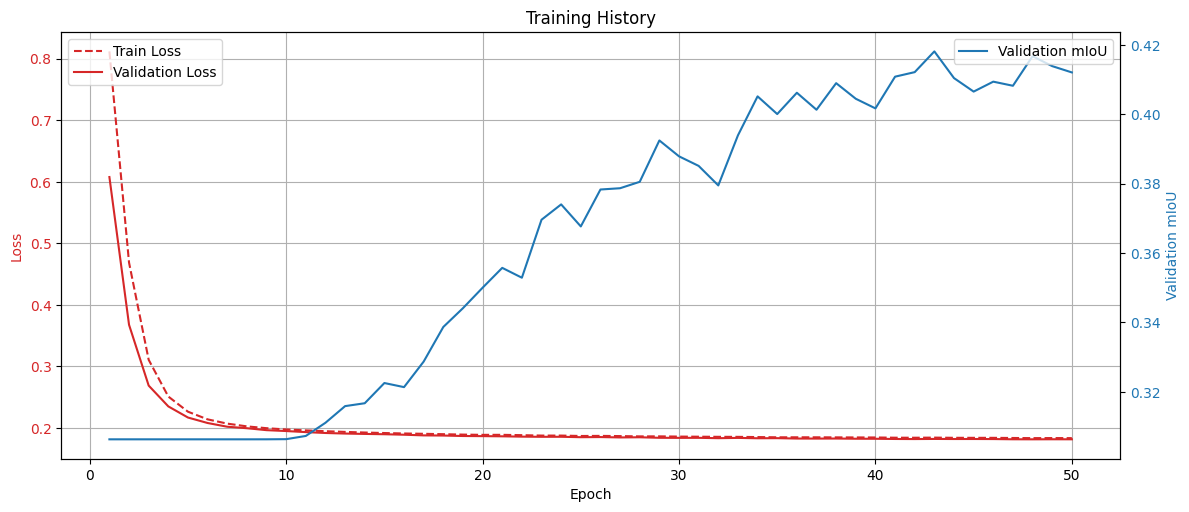

Using device for visualization: cuda

Visualizing some predictions on validation set (using corrected masks)...
Loading best model weights for visualization...
Debug: Visualizing sample index 246, Predicted mask max value: 2, Unique values: [0 1 2]
Debug: Visualizing sample index 338, Predicted mask max value: 2, Unique values: [0 1 2]
Debug: Visualizing sample index 284, Predicted mask max value: 2, Unique values: [0 1 2]
Debug: Visualizing sample index 51, Predicted mask max value: 2, Unique values: [0 1 2]
Debug: Visualizing sample index 519, Predicted mask max value: 2, Unique values: [0 1 2]


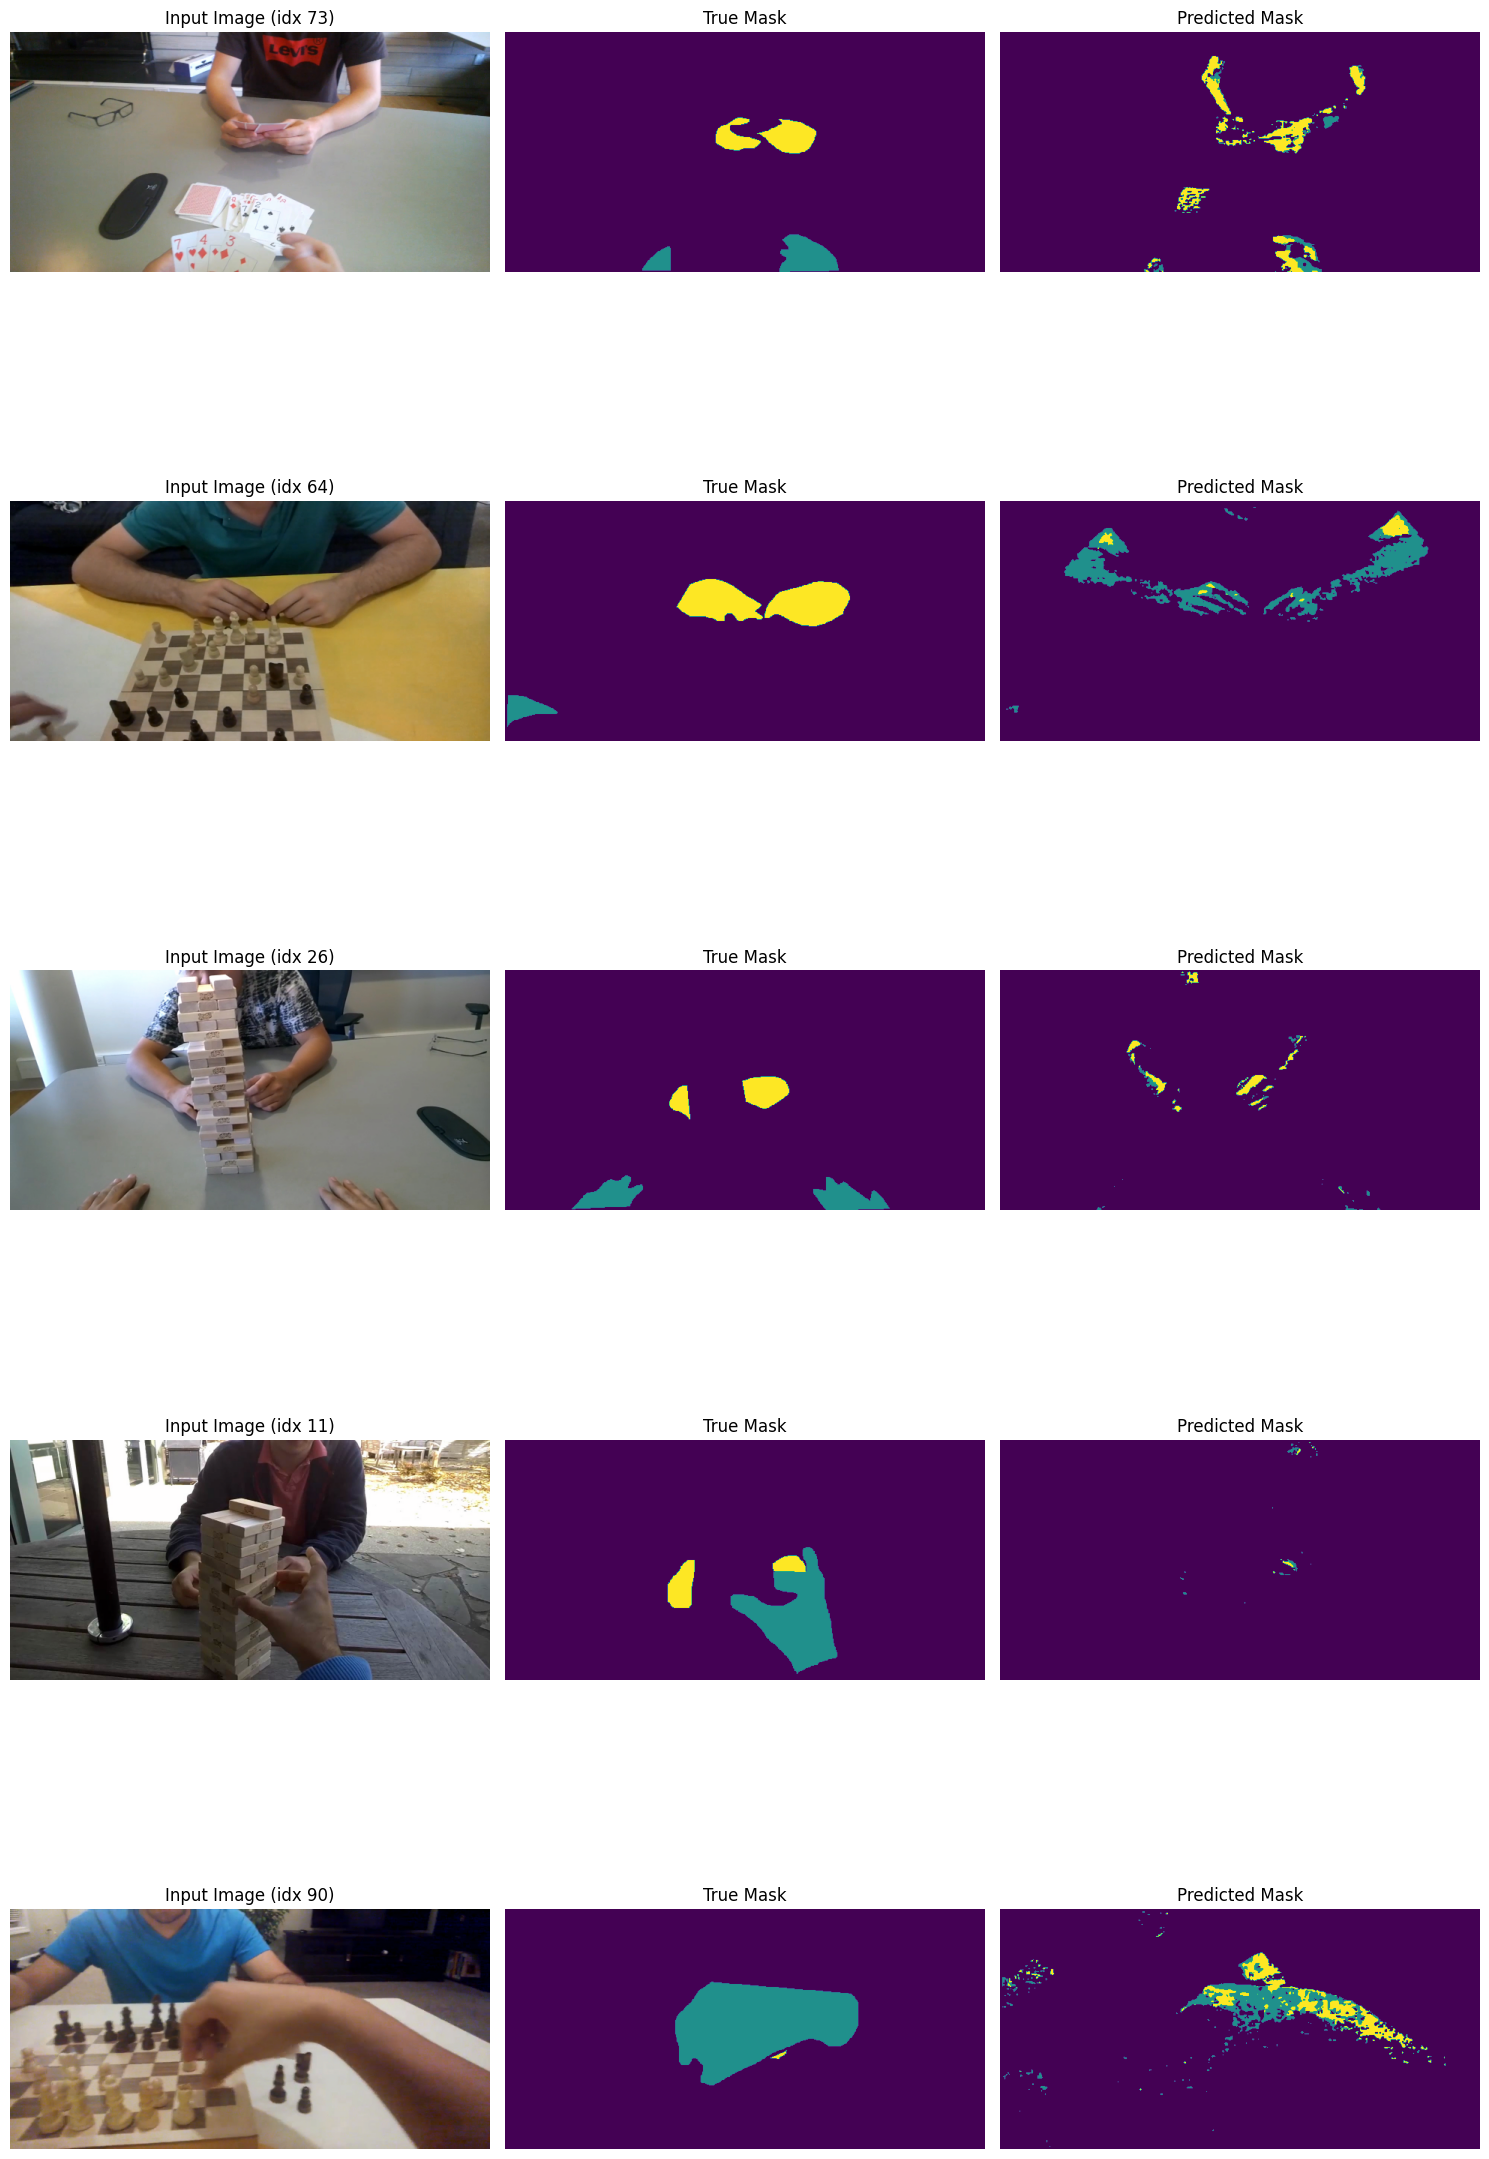


Code execution finished.


In [3]:
# --- 0. Install Dependencies ---
# Make sure these are installed in your environment
# !pip install kagglehub torch torchvision opencv-python-headless tqdm matplotlib scipy timm albumentations -q

# --- 1. Imports ---
import os
import glob
import random
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as TVTransforms # Use TVTransforms alias
from PIL import Image
from tqdm.notebook import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.io import loadmat
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time
from torchmetrics import JaccardIndex # Import IoU metric

# --- 2. Configuration & Constants ---
DATA_DIR = '/kaggle/input/egohands/egohands_data/_LABELLED_SAMPLES/' # Adjusted path based on inspection output
ORIG_IMG_HEIGHT = 720
ORIG_IMG_WIDTH = 1280
IMG_HEIGHT = 320 # Target H for model input
IMG_WIDTH = 640 # Target W for model input

BATCH_SIZE = 8 # Adjust based on GPU memory
NUM_CLASSES = 3  # 0: background, 1: my hand, 2: your hand
LEARNING_RATE = 1e-4
NUM_EPOCHS = 50 # Adjust as needed (might need more now)
VAL_SPLIT = 0.15
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {DEVICE}")

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# --- 3. Helper Function to Create Mask (CORRECTED version) ---
def create_mask_from_polygons(mat_data, frame_idx_0_99, orig_height, orig_width, num_classes):
    """
    Creates a segmentation mask for a specific frame from polygon data
    at the original image dimensions, using the correct structured array access.

    Args:
        mat_data: Loaded data from polygons.mat.
        frame_idx_0_99: The 0-based index of the frame within the video sequence (0-99).
        orig_height: Original mask height (e.g., 720).
        orig_width: Original mask width (e.g., 1280).
        num_classes: Number of classes (including background).

    Returns:
        A numpy array representing the segmentation mask (size: orig_height x orig_width).
    """
    mask = np.zeros((orig_height, orig_width), dtype=np.uint8)

    try:
        # Access the structured array for the specific frame
        frame_data = mat_data['polygons'][0][frame_idx_0_99]
    except IndexError:
        # print(f"Warning: Frame index {frame_idx_0_99} out of bounds for polygons data.")
        return mask
    except Exception as e:
        # print(f"Warning: Error accessing frame data for index {frame_idx_0_99}: {e}")
        return mask

    # Define field names and their corresponding class IDs
    # Class 1 = My Hand, Class 2 = Your Hand
    hand_fields = {
        'myleft': 1, 'myright': 1,
        'yourleft': 2, 'yourright': 2
    }

    # Check if the frame_data object has the expected fields (dtype names)
    if not (hasattr(frame_data.dtype, 'names') and frame_data.dtype.names):
        # print(f"Warning: Frame data for index {frame_idx_0_99} does not have expected named fields.")
        return mask

    available_fields = frame_data.dtype.names

    # Iterate through the hand types we care about
    for field_name, class_id in hand_fields.items():
        if field_name not in available_fields:
            continue

        try:
            # Access the polygon points using the field name
            points_array = frame_data[field_name]

            # Check if the array is not empty and has the expected shape (N, 2)
            if isinstance(points_array, np.ndarray) and points_array.ndim == 2 and points_array.shape[0] > 0 and points_array.shape[1] == 2:
                points = points_array.astype(np.int32)
                # Try direct points first (often [col, row] in CV contexts)
                points_cv = points
                # If masks look swapped (x/y), use the line below instead:
                # points_cv = points[:, [1, 0]].astype(np.int32) # Swaps X, Y

                # Clip points to ensure they are within the original image bounds
                points_cv[:, 0] = np.clip(points_cv[:, 0], 0, orig_width - 1)  # Clip X/col
                points_cv[:, 1] = np.clip(points_cv[:, 1], 0, orig_height - 1) # Clip Y/row

                # Fill polygon on the original-sized mask with the correct class_id
                cv2.fillPoly(mask, [points_cv], color=class_id)

        except Exception as e:
            # print(f"Warning: Error processing field '{field_name}' for frame {frame_idx_0_99}: {e}")
            continue

    return mask


# --- 4. EgoHands Dataset Class (Uses 0-99 Index) ---
class EgoHandsDataset(Dataset):
    def __init__(self, data_dir, file_list, orig_height, orig_width, num_classes, target_height, target_width, transforms=None):
        self.data_dir = data_dir
        self.file_list = file_list
        self.orig_height = orig_height
        self.orig_width = orig_width
        self.num_classes = num_classes
        self.target_height = target_height
        self.target_width = target_width
        self.transforms = transforms
        self.mat_cache = {}

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_path, video_folder, frame_idx_0_99 = self.file_list[idx]
        video_path = os.path.join(self.data_dir, video_folder)
        mat_path = os.path.join(video_path, 'polygons.mat')

        dummy_img = torch.zeros((3, self.target_height, self.target_width), dtype=torch.float32)
        dummy_mask = torch.zeros((self.target_height, self.target_width), dtype=torch.long)

        try:
            image = cv2.imread(img_path)
            if image is None: return dummy_img, dummy_mask
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        except Exception as e: return dummy_img, dummy_mask

        if image.shape[0] != self.orig_height or image.shape[1] != self.orig_width:
             image = cv2.resize(image, (self.orig_width, self.orig_height), interpolation=cv2.INTER_LINEAR)

        if video_path not in self.mat_cache:
            try: self.mat_cache[video_path] = loadmat(mat_path)
            except Exception as e: return dummy_img, dummy_mask
        mat_data = self.mat_cache[video_path]

        # Call the CORRECTED mask creation function
        mask = create_mask_from_polygons(mat_data, frame_idx_0_99, self.orig_height, self.orig_width, self.num_classes)

        if self.transforms:
            try:
                augmented = self.transforms(image=image, mask=mask)
                image = augmented['image']
                mask = augmented['mask']
            except Exception as e: return dummy_img, dummy_mask

        mask = mask.long()
        return image, mask

# --- 5. Data Preparation: Find images and map them with correct 0-99 index ---
all_files = []
video_folders = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
print(f"Found {len(video_folders)} video folders.")
for folder in tqdm(video_folders, desc="Scanning Folders"):
    folder_path = os.path.join(DATA_DIR, folder)
    img_files = sorted(glob.glob(os.path.join(folder_path, 'frame_*.jpg')), key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0]))
    mat_file = os.path.join(folder_path, 'polygons.mat')
    if not os.path.exists(mat_file) or not img_files: continue
    for i, img_path in enumerate(img_files):
        all_files.append((img_path, folder, i))
print(f"Found {len(all_files)} total labeled frames.")
# (Optional Warning if count != 4800)

random.shuffle(all_files)
split_idx = int(len(all_files) * (1 - VAL_SPLIT))
train_files = all_files[:split_idx]
val_files = all_files[split_idx:]
print(f"Training samples: {len(train_files)}, Validation samples: {len(val_files)}")

# --- 6. Transformations ---
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
train_transforms = A.Compose([
    A.Resize(height=IMG_HEIGHT, width=IMG_WIDTH, interpolation=cv2.INTER_LINEAR), # mask_interpolation defaults to NEAREST
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=mean, std=std),
    ToTensorV2(),
])
val_transforms = A.Compose([
    A.Resize(height=IMG_HEIGHT, width=IMG_WIDTH, interpolation=cv2.INTER_LINEAR),
    A.Normalize(mean=mean, std=std),
    ToTensorV2(),
])

# --- 7. Create Datasets and DataLoaders ---
train_dataset = EgoHandsDataset(DATA_DIR, train_files, ORIG_IMG_HEIGHT, ORIG_IMG_WIDTH, NUM_CLASSES, IMG_HEIGHT, IMG_WIDTH, transforms=train_transforms)
val_dataset = EgoHandsDataset(DATA_DIR, val_files, ORIG_IMG_HEIGHT, ORIG_IMG_WIDTH, NUM_CLASSES, IMG_HEIGHT, IMG_WIDTH, transforms=val_transforms)
num_workers=os.cpu_count()
print(f"Using {num_workers} workers for DataLoaders.")
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers, pin_memory=True, persistent_workers=num_workers>0, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers, pin_memory=True, persistent_workers=num_workers>0, drop_last=False)

# --- Verify one batch ---
print("Verifying data loader with corrected mask function...")
try:
    images, masks = next(iter(train_loader))
    print("Image batch shape:", images.shape)
    print("Mask batch shape:", masks.shape)
    print("Mask data type:", masks.dtype)
    unique_mask_vals = torch.unique(masks)
    print("Mask unique values:", unique_mask_vals) # Should now hopefully contain 1s and/or 2s
    if not any(val in unique_mask_vals for val in [1, 2]):
         print("Warning: Initial batch masks still seem to lack hand pixels (1 or 2). Further debugging of create_mask_from_polygons or MAT file content might be needed.")
    else:
         print("Initial batch contains hand pixels. Data loader verification successful.")
except Exception as e:
    print(f"Error getting batch from train_loader: {e}")
    raise


# --- 8. Define HRNet Model (Using features_only=True) ---
model_name = 'hrnet_w18'
print(f"Creating base model: {model_name} with features_only=True")
base_model = timm.create_model(model_name, pretrained=True, features_only=True)
print("Determining feature channels from base model using dummy pass...")
dummy_input = torch.randn(2, 3, IMG_HEIGHT, IMG_WIDTH).to(DEVICE)
base_model = base_model.to(DEVICE)
base_model.eval()
with torch.no_grad():
    dummy_output_features = base_model(dummy_input)
print(f"Debug: base_model output type: {type(dummy_output_features)}")
if isinstance(dummy_output_features, (list, tuple)):
    # Using feature map at index 0 based on previous successful run's shapes
    feature_map_index = 0
    selected_feature_map = dummy_output_features[feature_map_index]
    print(f"Selected feature map at index {feature_map_index} with shape: {selected_feature_map.shape}")
else:
    raise TypeError(f"Expected list/tuple from features_only=True model, got {type(dummy_output_features)}")
if selected_feature_map.ndim == 4:
    feature_channels = selected_feature_map.shape[1]
    feature_height = selected_feature_map.shape[2]
    feature_width = selected_feature_map.shape[3]
    print(f"Selected features: Channels={feature_channels}, H={feature_height}, W={feature_width}")
else:
    raise ValueError(f"Selected feature map has unexpected shape: {selected_feature_map.shape}")

class SimpleSegmentationHead(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, num_classes, kernel_size=1)
    def forward(self, features):
        return self.conv(features)

class HRNetSegmentation(nn.Module):
    def __init__(self, base_model, feature_map_index, head):
        super().__init__()
        self.base_model = base_model
        self.feature_map_index = feature_map_index
        self.head = head
    def forward(self, x):
        input_h, input_w = x.shape[-2:]
        features_list = self.base_model(x)
        selected_features = features_list[self.feature_map_index]
        segmentation_logits = self.head(selected_features)
        segmentation_logits = nn.functional.interpolate(
            segmentation_logits, size=(input_h, input_w), mode='bilinear', align_corners=False)
        return segmentation_logits

segmentation_head = SimpleSegmentationHead(feature_channels, NUM_CLASSES)
model = HRNetSegmentation(base_model, feature_map_index, segmentation_head)
model = model.to(DEVICE)

# --- 9. Loss Function and Optimizer ---
criterion = nn.CrossEntropyLoss() # Consider class weighting if needed later
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1, verbose=True)


# --- 10. Training Loop ---
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    pbar = tqdm(loader, desc="Training", leave=False)
    for images, masks in pbar:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        if outputs.shape[-2:] != masks.shape[-2:]:
             outputs = nn.functional.interpolate(outputs, size=masks.shape[-2:], mode='bilinear', align_corners=False)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        batch_loss = loss.item()
        running_loss += batch_loss * images.size(0)
        pbar.set_postfix(loss=f"{batch_loss:.4f}")
    epoch_loss = running_loss / len(loader.dataset)
    epoch_time = time.time() - start_time
    return epoch_loss, epoch_time

# --- 11. Evaluation Loop (with IoU) ---
def evaluate_epoch(model, loader, criterion, device, num_classes):
    model.eval()
    running_loss = 0.0
    jaccard = JaccardIndex(task="multiclass", num_classes=num_classes).to(device) # Initialize IoU metric
    with torch.no_grad():
        pbar = tqdm(loader, desc="Validation", leave=False)
        for images, masks in pbar:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            if outputs.shape[-2:] != masks.shape[-2:]:
                 outputs = nn.functional.interpolate(outputs, size=masks.shape[-2:], mode='bilinear', align_corners=False)
            loss = criterion(outputs, masks)
            running_loss += loss.item() * images.size(0)
            # Update IoU metric
            preds = torch.argmax(outputs, dim=1)
            jaccard.update(preds, masks)
            pbar.set_postfix(loss=f"{loss.item():.4f}")

    epoch_loss = running_loss / len(loader.dataset)
    epoch_miou = jaccard.compute() # Compute final IoU for the epoch
    jaccard.reset() # Reset metric for next epoch
    return epoch_loss, epoch_miou


# --- 12. Main Training Execution ---
train_losses = []
val_losses = []
val_mious = [] # Track mIoU
best_val_metric = float('inf') # Use loss initially, or switch to -mIoU if maximizing
metric_mode = 'min' # 'min' for loss, 'max' for mIoU

print("\n--- Starting Training with Corrected Masks ---")
total_start_time = time.time()
for epoch in range(NUM_EPOCHS):
    print(f"\nEpoch {epoch+1}/{NUM_EPOCHS}")
    train_loss, train_time = train_epoch(model, train_loader, criterion, optimizer, DEVICE)
    train_losses.append(train_loss)
    print(f"Train Loss: {train_loss:.4f} | Time: {train_time:.2f}s")

    val_loss, val_miou = evaluate_epoch(model, val_loader, criterion, DEVICE, NUM_CLASSES)
    val_losses.append(val_loss)
    val_mious.append(val_miou.item()) # Store mIoU value
    print(f"Val Loss: {val_loss:.4f} | Val mIoU: {val_miou:.4f}")

    scheduler.step(val_loss) # Schedule based on validation loss

    # Save the best model (based on validation loss here, could change to mIoU)
    current_val_metric = val_loss
    if (metric_mode == 'min' and current_val_metric < best_val_metric) or \
       (metric_mode == 'max' and current_val_metric > best_val_metric):
        best_val_metric = current_val_metric
        save_path = 'hrnet_egohands_best.pth'
        torch.save(model.state_dict(), save_path)
        print(f"Model saved to {save_path} (Val Loss: {val_loss:.4f}, Val mIoU: {val_miou:.4f})")

total_end_time = time.time()
print(f"\n--- Training Finished ---")
print(f"Total Training Time: {(total_end_time - total_start_time)/60:.2f} minutes")
print(f"Best Validation Metric ({'Loss' if metric_mode=='min' else 'mIoU'}): {best_val_metric:.4f}")


# --- 13. Plotting Training History ---
fig, ax1 = plt.subplots(figsize=(12, 5))
# Plot Loss
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss', color=color, linestyle='--')
ax1.plot(range(1, NUM_EPOCHS + 1), val_losses, label='Validation Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot mIoU on secondary axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Validation mIoU', color=color)
ax2.plot(range(1, NUM_EPOCHS + 1), val_mious, label='Validation mIoU', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Training History')
plt.savefig('loss_miou_curve.png')
plt.show()

# --- 14. Example Prediction (with Debug Print) ---
import matplotlib.pyplot as plt # Ensure matplotlib is imported if running this cell separately
import torch # Ensure torch is imported
from torchvision import transforms as TVTransforms # Ensure transforms are imported
import random
import numpy as np
import os

# --- Define DEVICE again just before visualization ---
# Ensures DEVICE is available in this scope
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device for visualization: {DEVICE}")
# ---

# --- CORRECTED Function Definition (accepts num_classes, includes debug print) ---
def visualize_prediction(model, dataset, device, num_classes, num_samples=5): # Added num_classes parameter
    """Visualizes model predictions on a few samples from the dataset."""
    if len(dataset) == 0:
        print("Dataset is empty, cannot visualize predictions.")
        return
    model.eval() # Set model to evaluation mode
    num_samples = min(num_samples, len(dataset))
    if num_samples <= 0:
        print("Number of samples must be positive.")
        return

    indices = random.sample(range(len(dataset)), num_samples)

    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 5))
    if num_samples == 1: axes = np.array([axes]) # Ensure axes is indexable for single sample

    # Define inverse normalization transform using torchvision (ensure mean/std are available)
    # These MUST match the values used during training
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    inv_normalize = TVTransforms.Compose([
        TVTransforms.Normalize(mean=[0., 0., 0.], std=[1/s for s in std]),
        TVTransforms.Normalize(mean=[-m for m in mean], std=[1., 1., 1.]),
        TVTransforms.ToPILImage()
    ])

    with torch.no_grad(): # Disable gradient calculations for inference
        for i, idx in enumerate(indices):
            try:
                # Get image and mask from dataset (already transformed)
                image_tensor, true_mask_tensor = dataset[idx]
                # Add batch dimension and send image to device
                image_input = image_tensor.unsqueeze(0).to(device)

                # Get model prediction
                output = model(image_input) # Output: [1, C, H, W]
                # Convert logits to predicted class index per pixel
                pred_mask = torch.argmax(output.squeeze(0), dim=0).cpu().numpy() # Shape: H, W

                # --- Debug Print Statement ---
                # Check the actual values present in the prediction
                print(f"Debug: Visualizing sample index {idx}, Predicted mask max value: {np.max(pred_mask)}, Unique values: {np.unique(pred_mask)}")
                # --- End Debug Print ---

                # Prepare image and masks for display
                image_display = inv_normalize(image_tensor.cpu())
                true_mask_display = true_mask_tensor.cpu().numpy() # Shape: H, W

                # Plotting
                ax = axes[i] if num_samples > 1 else axes # Adjust indexing for single sample

                ax[0].imshow(image_display)
                ax[0].set_title(f'Input Image (idx {dataset.file_list[idx][2]})') # Assumes file_list accessible
                ax[0].axis('off')

                ax[1].imshow(true_mask_display, cmap='viridis', vmin=0, vmax=num_classes-1) # Use num_classes param
                ax[1].set_title('True Mask')
                ax[1].axis('off')

                ax[2].imshow(pred_mask, cmap='viridis', vmin=0, vmax=num_classes-1) # Use num_classes param
                ax[2].set_title('Predicted Mask')
                ax[2].axis('off')
            except Exception as e:
                print(f"Error visualizing sample index {idx}: {e}")
                # Clear axes on error for this sample
                ax = axes[i] if num_samples > 1 else axes
                ax[0].clear(); ax[1].clear(); ax[2].clear();
                ax[0].set_title('Error'); ax[1].set_title('Error'); ax[2].set_title('Error')
                ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off');

    plt.tight_layout()
    plt.savefig('predictions_sample_corrected_debug.png') # Save plot with new name
    plt.show()
# --- End of Function Definition ---


# --- Calling Code Block for Visualization ---
print("\nVisualizing some predictions on validation set (using corrected masks)...")

# --- Need the model instance defined and NUM_CLASSES ---
# Ensure 'model' is the trained model instance loaded with correct architecture
# Ensure NUM_CLASSES = 3 is defined
# Ensure 'val_dataset' is defined and loaded

# --- Pass NUM_CLASSES to the visualize function call ---
if 'val_dataset' in locals() or 'val_dataset' in globals():
     if os.path.exists('hrnet_egohands_best.pth'):
         print("Loading best model weights for visualization...")
         if 'model' in locals() or 'model' in globals():
             if 'NUM_CLASSES' in locals() or 'NUM_CLASSES' in globals():
                 try:
                     # Set weights_only=True to suppress the warning (recommended)
                     model.load_state_dict(torch.load('hrnet_egohands_best.pth', map_location=DEVICE, weights_only=True))
                     # Call the visualization function
                     visualize_prediction(model, val_dataset, DEVICE, num_classes=NUM_CLASSES, num_samples=5)
                 except NameError as ne:
                      print(f"NameError during visualization setup (maybe 'DEVICE'/'model'/'NUM_CLASSES' not defined?): {ne}")
                 except RuntimeError as re:
                      print(f"RuntimeError during model loading (likely architecture mismatch or corrupted file): {re}")
                 except Exception as e:
                     print(f"Error during model loading or visualization call: {e}")
             else:
                  print("Error: NUM_CLASSES not defined before visualization.")
         else:
              print("Error: 'model' architecture not defined before loading weights.")
     else:
          print("Saved model weights 'hrnet_egohands_best.pth' not found.")
else:
    print("Validation dataset ('val_dataset') not found.")


print("\nCode execution finished.")